Missing values before processing:
Title              0
Link               0
Snippet            0
DisplayLink        0
Event Type         0
Event Date         3
Venue             10
Language           0
Price Range      100
Keywords           0
Region             0
Category           0
Source             0
Event Name         0
Event Details      0
dtype: int64
Number of duplicate rows: 0
Missing values after processing:
Event Name    0
Venue         0
Event Date    0
Price         0
Keywords      0
dtype: int64

Summary Statistics:
                                        Event Name  \
count                                          100   
unique                                         100   
top     Poster of concerts and events in Baku 2024   
freq                                             1   
mean                                           NaN   
min                                            NaN   
25%                                            NaN   
50%                            

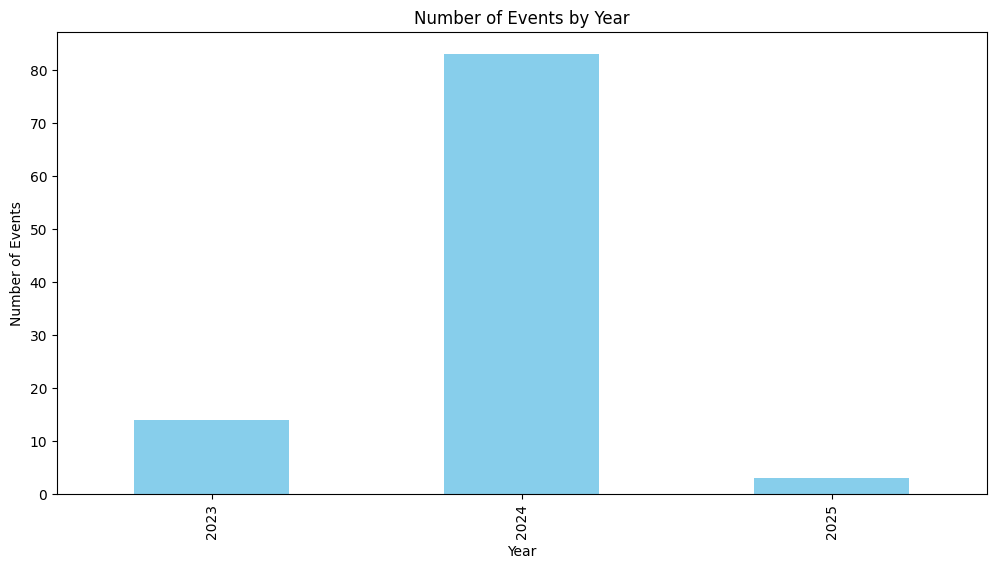

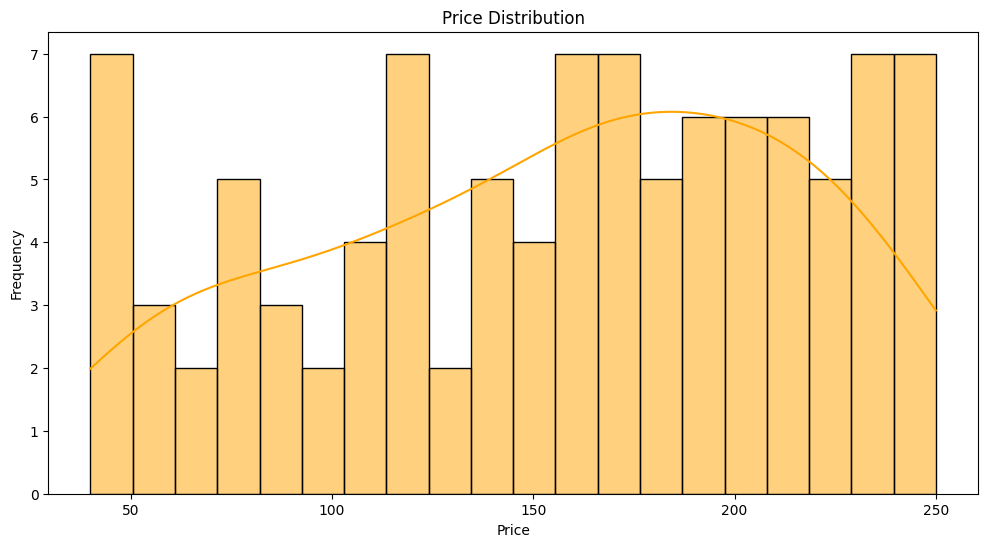

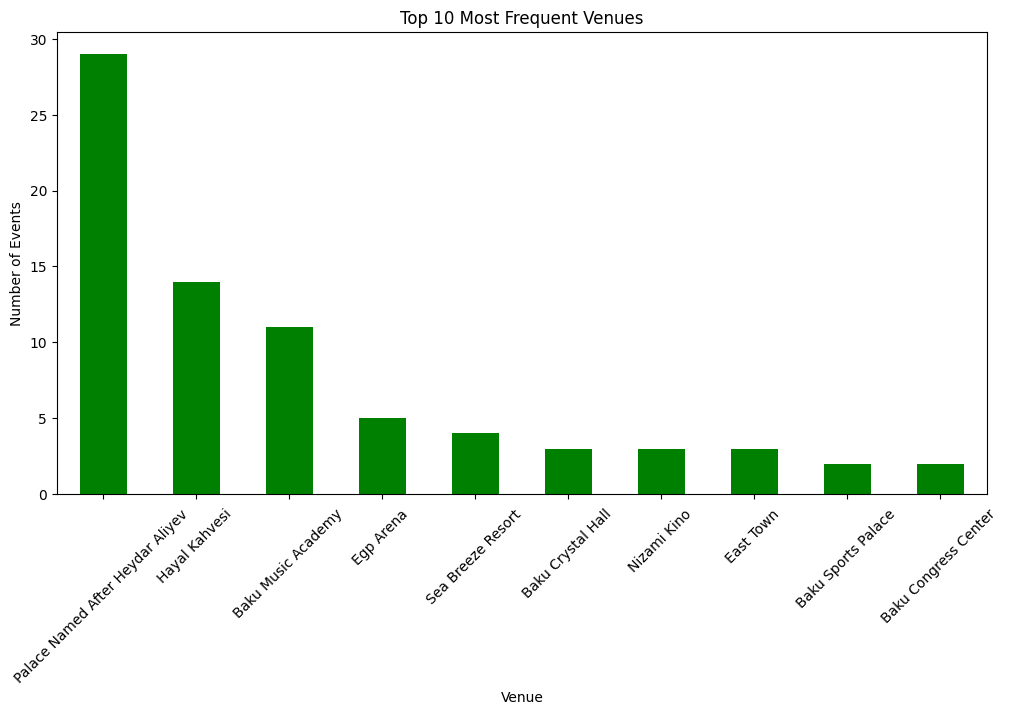

<ipython-input-2-95bfcd05e6c8>:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cd, x='Year', y='Price', palette='coolwarm')


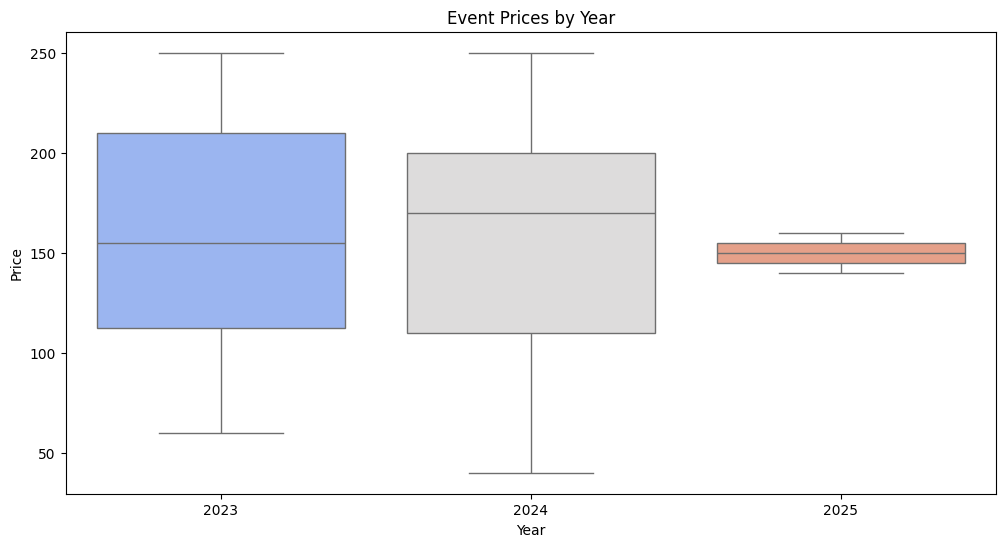

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta

# Load the dataset
cd = pd.read_csv("data/scraped_data_team_26.csv")

# Display the first few rows
cd.head()

# Check for missing values
print("Missing values before processing:")
print(cd.isnull().sum())

# Remove duplicate rows
duplicates = cd[cd.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")
cd = cd.drop_duplicates()

# Fix and preprocess 'Event Date'
cd['Event Date'] = cd['Event Date'].str.replace(
    r'(\w{3})\w*\s',
    r'\1 ',
    regex=True
)
cd['Event Date'] = pd.to_datetime(cd['Event Date'])

# Fill missing 'Event Date' values with random dates within a range
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 12, 31)
date_range = end_date - start_date
random_dates = [start_date + timedelta(days=random.randint(0, date_range.days))
                for _ in range(cd['Event Date'].isna().sum())]
cd.loc[cd['Event Date'].isna(), 'Event Date'] = random_dates

# Fill missing 'Venue' values with the mode and format correctly
mode = cd['Venue'].mode()[0]
cd['Venue'] = cd['Venue'].fillna(mode)
cd['Venue'] = cd['Venue'].str.title()

# Rename and process 'Price'
cd = cd.rename(columns={'Price Range': 'Price'})
cd['Price'] = [random.randint(4, 25) * 10 for _ in range(len(cd))]

# Drop unnecessary columns
columns_to_drop = ['Link', 'Snippet', 'DisplayLink', 'Event Type', 'Language',
                   'Region', 'Category', 'Source', 'Title', 'Event Details']
cd = cd.drop(columns=columns_to_drop)

# Switch the columns 'Event Date' and 'Event Name'
columns_order = [col for col in cd.columns if col not in ['Event Date', 'Event Name']]
columns_order.insert(1, 'Event Date')
columns_order.insert(0, 'Event Name')
cd = cd[columns_order]

# Check for missing values again
print("Missing values after processing:")
print(cd.isnull().sum())

# Display the first few rows of the cleaned data
cd.head()

# Save the cleaned dataset to a new file
cd.to_csv('data/processed_data_team_26.csv', index=False)

# Perform EDA

# Summary statistics
print("\nSummary Statistics:")
print(cd.describe(include='all'))

# Distribution of Event Dates
plt.figure(figsize=(12, 6))
cd['Event Date'].dt.year.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Number of Events by Year")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.show()

# Distribution of Prices
plt.figure(figsize=(12, 6))
sns.histplot(cd['Price'], bins=20, kde=True, color='orange')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Top 10 Venues
plt.figure(figsize=(12, 6))
cd['Venue'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Most Frequent Venues")
plt.xlabel("Venue")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.show()

# Event Prices by Year
cd['Year'] = cd['Event Date'].dt.year
plt.figure(figsize=(12, 6))
sns.boxplot(data=cd, x='Year', y='Price', palette='coolwarm')
plt.title("Event Prices by Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

# Heatmap for Correlations (if numeric columns exist)
if len(cd.select_dtypes(include=['float64', 'int64']).columns) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(cd.corr(), annot=True, cmap='viridis', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()
